In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
pwd


'C:\\Users\\Amarsinh'

In [3]:
cd Amarsinh

[WinError 2] The system cannot find the file specified: 'Amarsinh'
C:\Users\Amarsinh


In [4]:
cd Downloads

C:\Users\Amarsinh\Downloads


In [5]:
df =pd.read_csv(r"C:\Users\Amarsinh\Downloads\titanic.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Verify no missing values remain
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


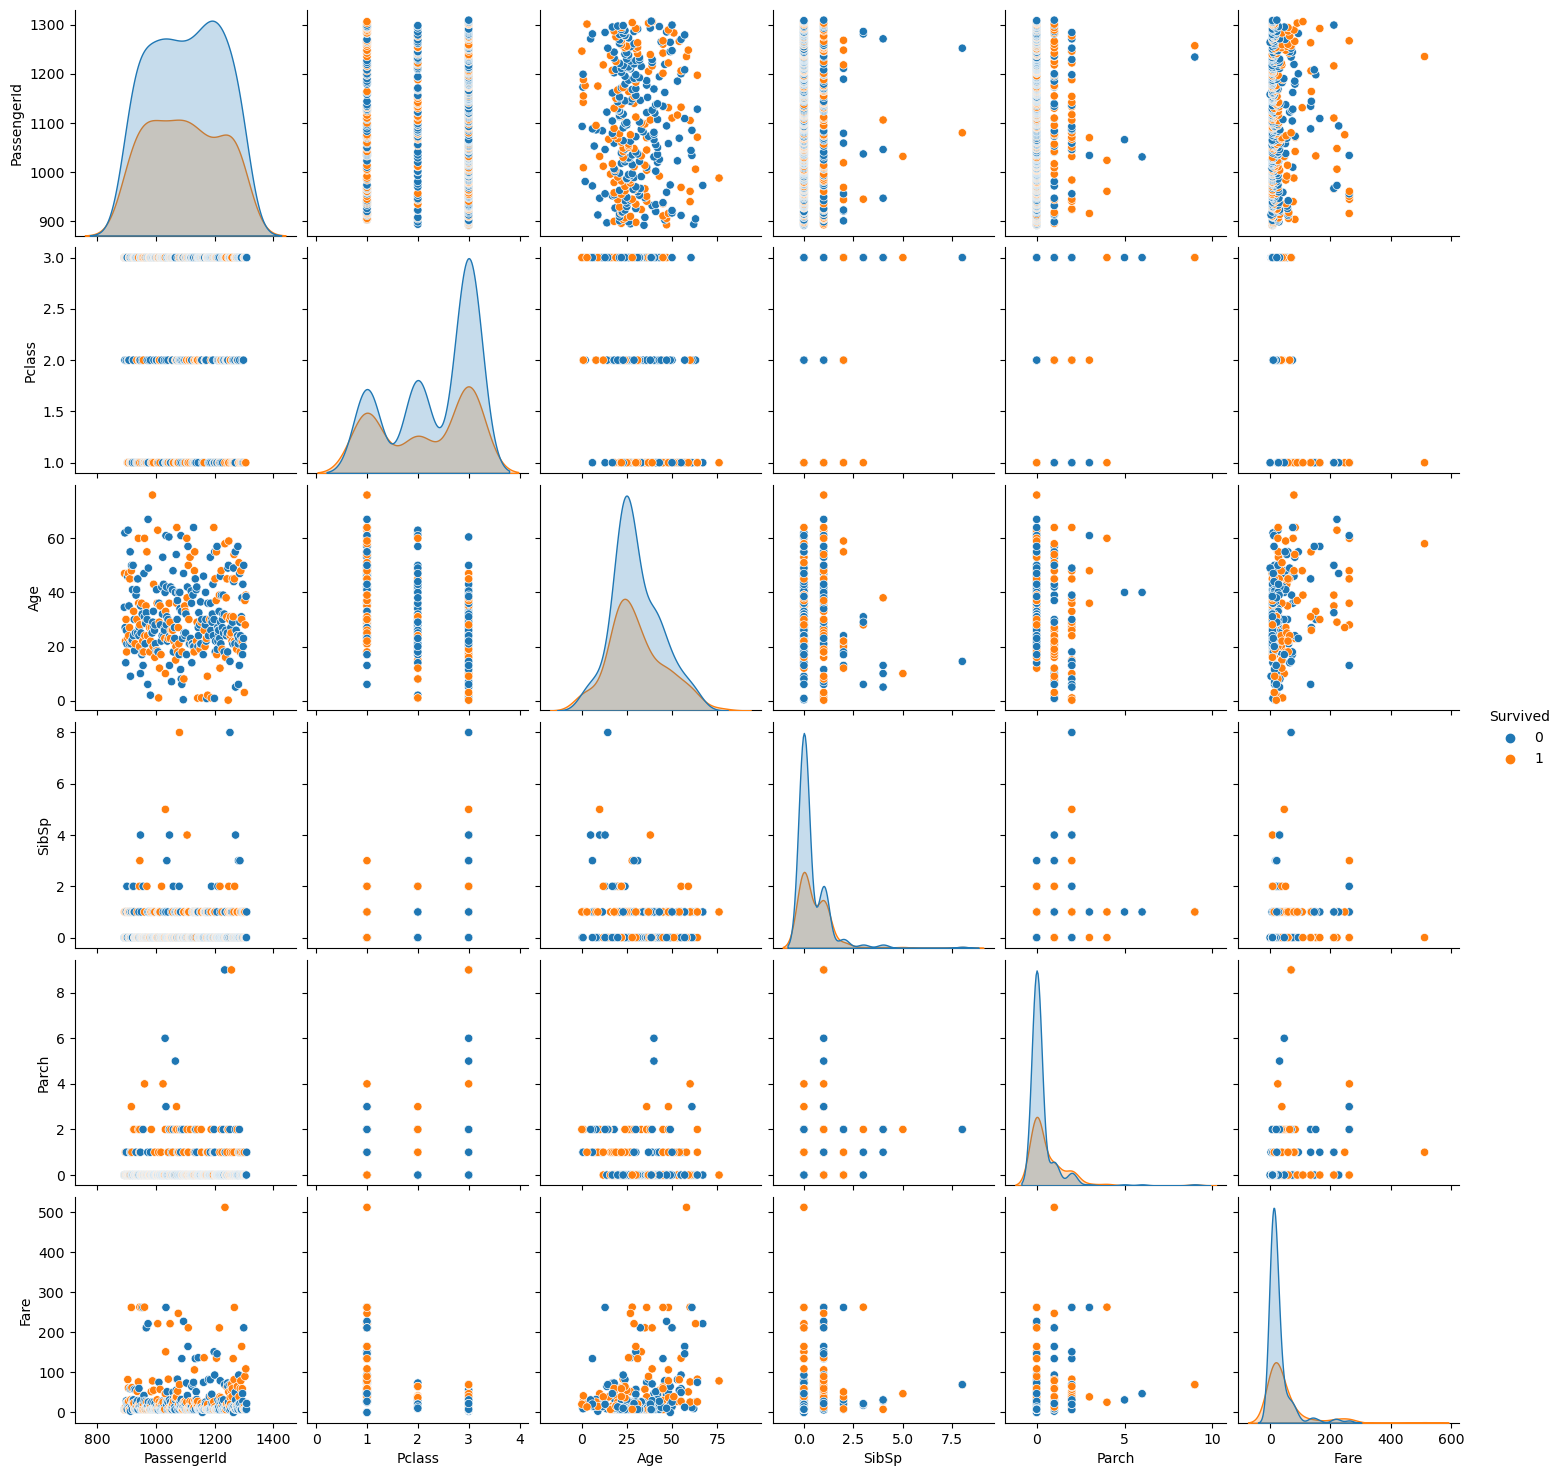

In [11]:
sns.pairplot(df, hue="Survived")



# Title Extraction from Name



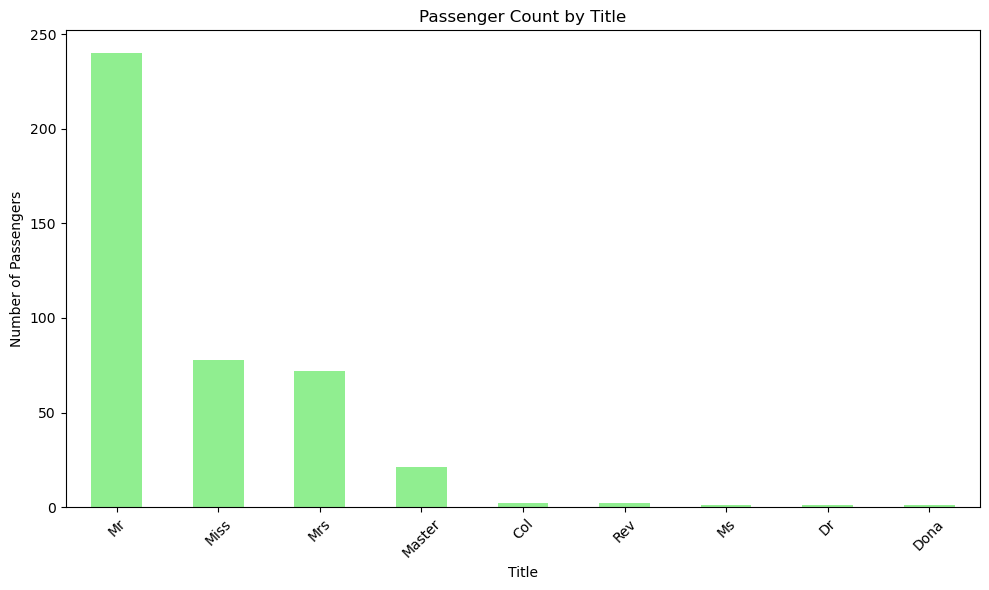

In [12]:
#Extract titles (Mr., Mrs., Miss, etc.) from the 'Name' column as it might correlate with survival.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



# Count the number of passengers with each title
counts = df['Title'].value_counts()

# Create a bar plot for titles
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='lightgreen')
plt.title('Passenger Count by Title')
plt.xlabel('Title')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [13]:
columns_to_drop = ['Name']
df.drop(columns_to_drop, axis=1, inplace=True)

# family size

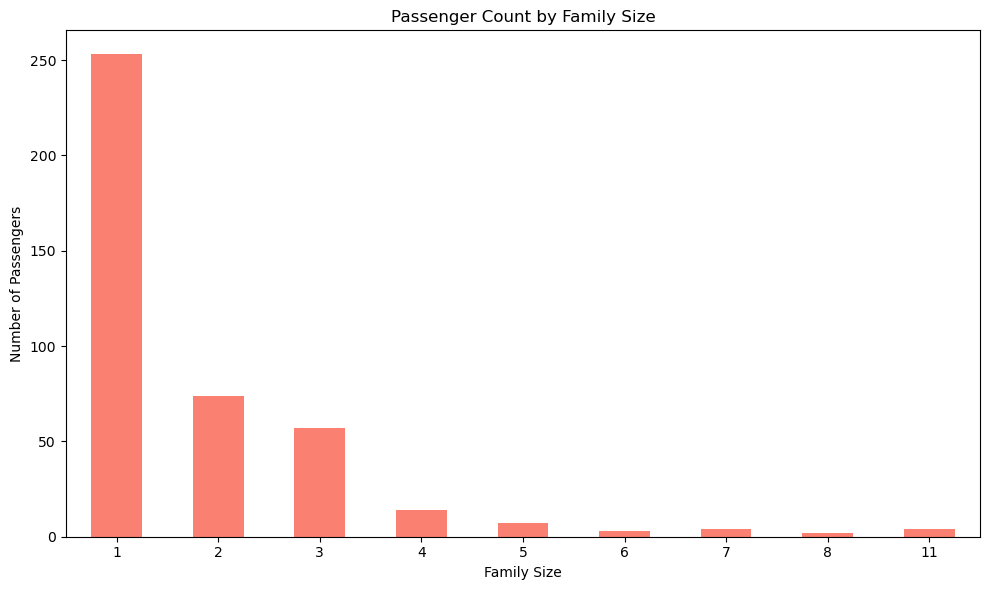

In [14]:
family_size=df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Count the number of passengers in each family size category
counts = df['FamilySize'].value_counts().sort_index()

# Create a bar plot for family sizes
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='salmon')
plt.title('Passenger Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Handling missing values in Age column (replace with mean/median)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handling missing values in Cabin column (fill with 'Unknown')
df['Cabin'].fillna('unknown', inplace=True)

df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Age Grouping




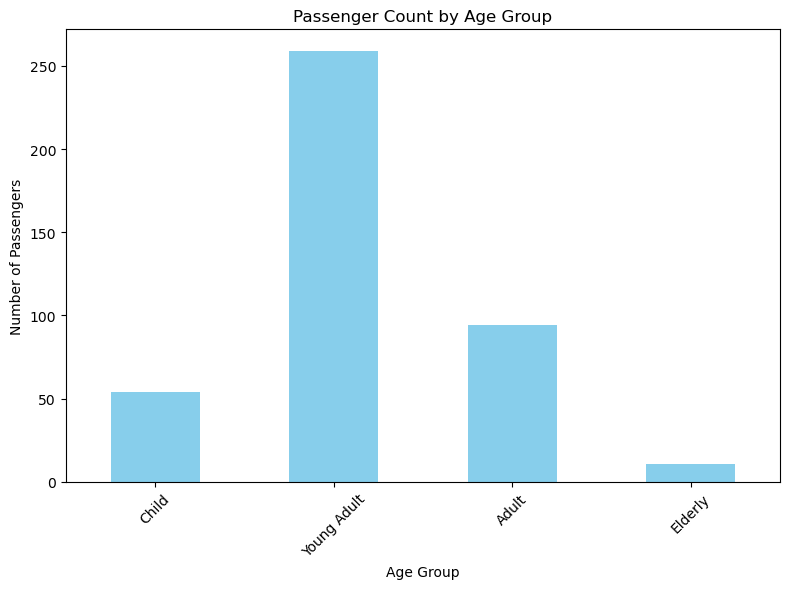

In [16]:



# Create age groups
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count the number of passengers in each age group
counts = df['AgeGroup'].value_counts().sort_index()

# Create a bar plot for age groups
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Passenger Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Fare per Person

In [17]:
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['FarePerPerson']

0        7.829200
1        3.500000
2        9.687500
3        8.662500
4        4.095833
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: FarePerPerson, Length: 418, dtype: float64

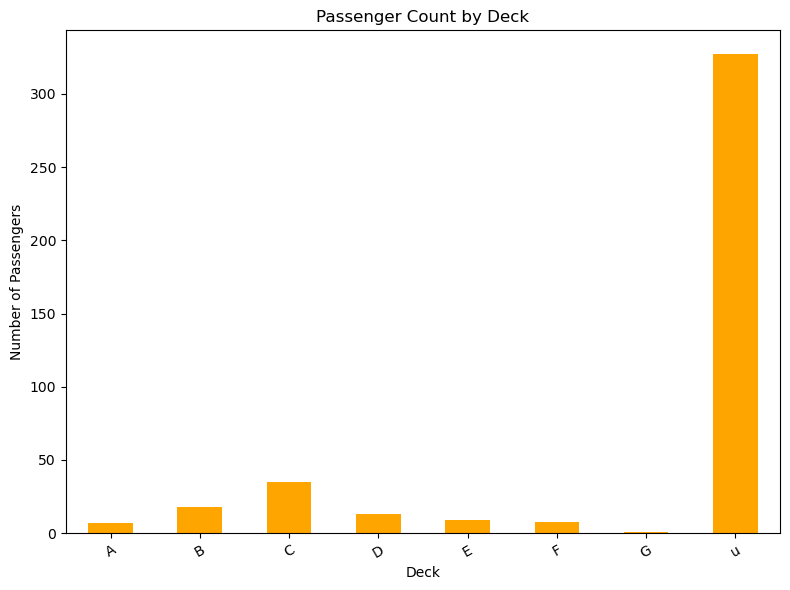

In [18]:
#The "Deck" information extracted for insights into passenger locations on the ship.
df['Deck'] = df['Cabin'].str[:1]

# Count the number of passengers on each deck
deck_counts = df['Deck'].value_counts().sort_index()

# Create a bar plot for deck distribution
plt.figure(figsize=(8, 6))
deck_counts.plot(kind='bar', color='orange')
plt.title('Passenger Count by Deck')
plt.xlabel('Deck')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'AgeGroup', 'FarePerPerson', 'Deck'],
      dtype='object')

C:\Users\Amarsinh\AppData\Local\Temp\ipykernel_6004\1962444712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


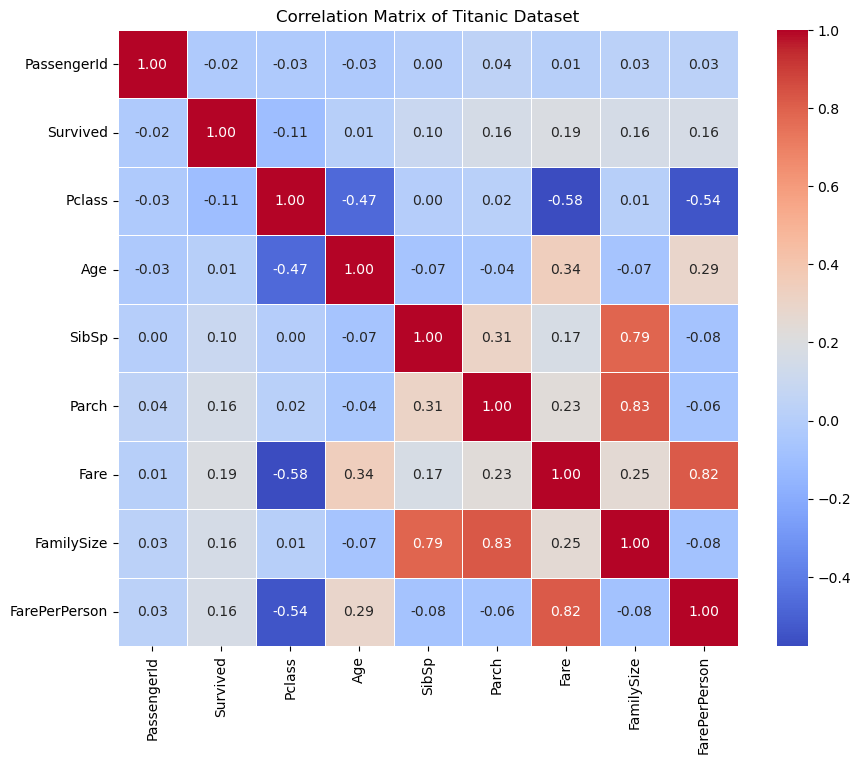

In [20]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()


In [21]:
# t-test
# perform a t-test to compare the mean age of survivors vs. non-survivors:

In [22]:
from scipy import stats

# Filter data for survivors and non-survivors
survivors_age = df[df['Survived'] == 1]['Age'].dropna()
non_survivors_age = df[df['Survived'] == 0]['Age'].dropna()

# Perform t-test for the difference in mean ages
t_statistic, p_value = stats.ttest_ind(survivors_age, non_survivors_age)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.6f}")


T-statistic: 0.16
P-value: 0.869907


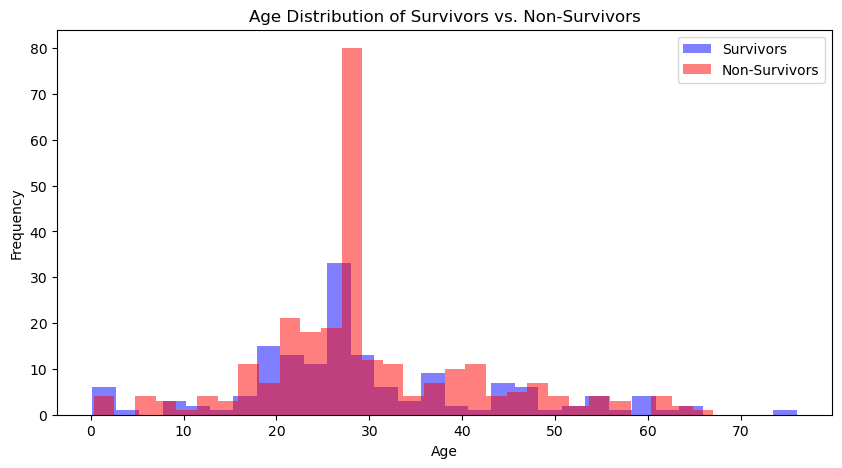

In [23]:


# Filter data for survivors and non-survivors
survivors_age = df[df['Survived'] == 1]['Age'].dropna()
non_survivors_age = df[df['Survived'] == 0]['Age'].dropna()

# Create overlapping histograms for age distribution
plt.figure(figsize=(10, 5))
plt.hist(survivors_age, bins=30, alpha=0.5, color='blue', label='Survivors')
plt.hist(non_survivors_age, bins=30, alpha=0.5, color='red', label='Non-Survivors')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [24]:
import pandas as pd

# Create a new DataFrame with 'Survived' column concatenated
# Assuming 'Survived' is the target variable you want to concatenate
# Replace 'target_data.csv' with the actual file containing 'Survived' data
survived_data = pd.read_csv(r'C:\Users\Amarsinh\Downloads\titanic.csv') 

# Concatenate 'Survived' column with the original dataset
concatenated_data = pd.concat([df, survived_data], axis=1)

# Display the new concatenated DataFrame
concatenated_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,unknown,...,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,unknown,...,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,240276,9.6875,unknown,...,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,unknown,...,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,unknown,...,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
# for now we drop ticket column
# Drop multiple columns ('Name', 'Ticket', 'Cabin')
columns_to_drop = ['Title']

df.drop(columns_to_drop, axis=1, inplace=True)

In [26]:
columns_to_drop = [ 'Ticket', 'Cabin']
df.drop(columns_to_drop, axis=1, inplace=True)

In [27]:
import pandas as pd



# Perform one-hot encoding on the 'Sex' column
sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)

# Perform one-hot encoding on the 'Embarked' column
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)

# Perform one-hot encoding on the 'Embarked' column
AgeGroup_encoded = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Concatenate the encoded columns with the original dataset
df = pd.concat([df, sex_encoded, AgeGroup_encoded], axis=1)



# Perform one-hot encoding on the 'Sex' column
Deck_encoded = pd.get_dummies(df['Deck'], prefix='Deck', drop_first=True)

# Drop the original 'Sex' and 'Embarked' columns after encoding
df.drop(['Sex', 'Embarked','AgeGroup','Deck'], axis=1, inplace=True)


In [28]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Sex_male,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Elderly
0,892,0,3,34.5,0,0,7.8292,1,7.829200,1,1,0,0
1,893,1,3,47.0,1,0,7.0000,2,3.500000,0,0,1,0
2,894,0,2,62.0,0,0,9.6875,1,9.687500,1,0,0,1
3,895,0,3,27.0,0,0,8.6625,1,8.662500,1,1,0,0
4,896,1,3,22.0,1,1,12.2875,3,4.095833,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,27.0,0,0,8.0500,1,8.050000,1,1,0,0
414,1306,1,1,39.0,0,0,108.9000,1,108.900000,0,0,1,0
415,1307,0,3,38.5,0,0,7.2500,1,7.250000,1,0,1,0
416,1308,0,3,27.0,0,0,8.0500,1,8.050000,1,1,0,0


In [29]:


# Select columns and combine using indexing
data = df[['Pclass', 'Age','FamilySize','Fare']]  

# Display the combined columns
print(data.head())


   Pclass   Age  FamilySize     Fare
0       3  34.5           1   7.8292
1       3  47.0           2   7.0000
2       2  62.0           1   9.6875
3       3  27.0           1   8.6625
4       3  22.0           3  12.2875


In [30]:
from sklearn.model_selection import train_test_split


# Define features and target variable
X = df.drop('Survived', axis=1)  # Assuming 'Survived' is the target variable
y = df['Survived']

# Split the data into training and testing sets (e.g., 80% train, 20% test)

# random_state is set for reproducibility; you can omit it or use a specific value

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display the sizes of the resulting sets
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train set size: {y_train.shape[0]} samples")
print(f"Test set size: {y_test.shape[0]} samples")



Train set size: 334 samples
Test set size: 84 samples
Train set size: 334 samples
Test set size: 84 samples


In [31]:
#Last bit - encode labels
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)